/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in greater
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in less


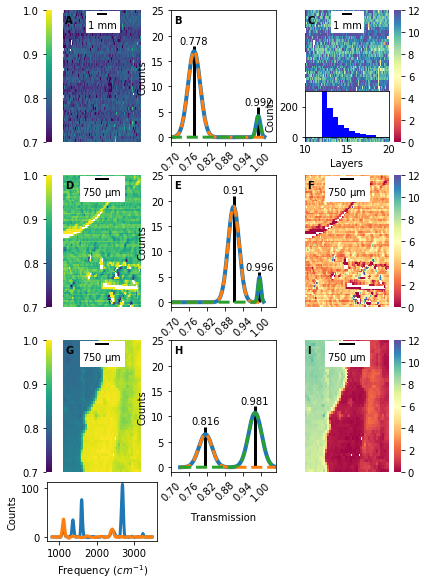

In [23]:
# This code shows the heatmap data and PDFs fits for experimentally measured graphene samples on different
# substrates

%matplotlib inline

import numpy as np; import matplotlib.pyplot as plt; import seaborn as sb; import string;
import matplotlib as mpl; plt.rcParams.update({'font.size': 10}); import statsmodels.api as sm;
from matplotlib_scalebar.scalebar import ScaleBar; import matplotlib.ticker as tick;
from mpl_toolkits.axes_grid.inset_locator import inset_axes;

def gauss(x,*params):
    y=np.zeros_like(x);
    for i in range(0,len(params),3):
        a=params[i]; x0=params[i+1]; sigma=params[i+2];
        y=y+a*np.exp(-(x-x0)**2/(2*sigma**2));
    return y

def nGr(t):
    a=(1/137);
    return ((1/np.sqrt(t))-1)*(2/(1.13*np.pi*a))

path='/Users/ajcjake/Desktop/Technique Paper/Laser Scan Data/Graphene experimental data/';

grPET10=np.genfromtxt(path+'10_gr_PET_rawDataArray.csv',delimiter=',')[:,17:];
# beam = 7 um, step size = 50 um
params1=np.genfromtxt(path+'10_gr_PET_fitParams.csv',delimiter=','); 
x1=np.genfromtxt(path+'10_gr_PET_xPDF.csv',delimiter=',');
y1=gauss(x1,*params1[:3])+gauss(x1,*params1[3:]);
layerArray1=nGr(grPET10);
layerThrsMax=12; idx=np.where(layerArray1>layerThrsMax); tH=layerArray1[idx];
layerThrsMin=0; idx=np.where(layerArray1<layerThrsMin); tL=layerArray1[idx];

grGlass68Logo=np.genfromtxt(path+'6_8_gr_glass_logo_rawDataArray.csv',delimiter=',')[20:100,20:100];
# beam = 7.3 um, step size = 55 um
params2=np.genfromtxt(path+'6_8_gr_glass_logo_fitParams.csv',delimiter=',');
x2=np.genfromtxt(path+'6_8_gr_glass_logo_xPDF.csv',delimiter=',');
y2=gauss(x2,*params2[:3])+gauss(x2,*params2[3:]);
layerArray2=nGr(grGlass68Logo); 

grGlass68A=np.genfromtxt(path+'6_8_gr_glass_A_rawDataArray.csv',delimiter=',');
# beam ~ 7 um, step size = 100 um
params3=np.genfromtxt(path+'6_8_gr_glass_A_fitParams.csv',delimiter=',');
x3=np.genfromtxt(path+'6_8_gr_glass_A_xPDF.csv',delimiter=',');
y3=gauss(x3,*params3[:3])+gauss(x3,*params3[3:6])+gauss(x3,*params3[6:]);
layerArray3=nGr(grGlass68A);

grGlass68ARaman=np.genfromtxt('/Users/ajcjake/Desktop/Technique Paper/Raman Data/6_8_gr_glass_A_v1_fixed.csv',
                              delimiter=',');
glass68ARaman=np.genfromtxt('/Users/ajcjake/Desktop/Technique Paper/Raman Data/6_8_gr_glass_A_glass_fixed.csv',
                              delimiter=',');

fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9))=plt.subplots(3,3,figsize=(6.69,8.5));
ax3b=inset_axes(ax3,width='100%',height='35%',loc='lower center');
ax7b=ax7.inset_axes([-0.20,-0.52,1.40,0.45]);

plt.subplots_adjust(hspace=0.25,wspace=0.28); lwd=3;

cmap1='viridis'; tMin=0.70; tMax=1.00; cmap2='Spectral';
heatmapDict1={'xticklabels':False, 
             'yticklabels':False, 
             'vmin':tMin, 'vmax':tMax,
             'cbar':True,
             'cmap':cmap1};
heatmapDict2={'xticklabels':False, 
             'yticklabels':False, 
             'vmin':layerThrsMin, 'vmax':layerThrsMax,
             'cbar':True,
             'cmap':cmap2};
lineDict={'color':'black',
          'linestyle':'-',
          'linewidth':lwd}

# row 1
sb.heatmap(grPET10,cbar_kws=dict(use_gridspec=False,location='left'),**heatmapDict1,ax=ax1); 
ax1.add_artist(ScaleBar(50,units='um',location='upper center'));

ax2.plot(x1,y1,color='C0',linestyle='-',linewidth=lwd+1);
ax2.plot(x1,gauss(x1,*params1[:3]),color='C1',linestyle='--',linewidth=lwd);
ax2.plot(x1,gauss(x1,*params1[3:]),color='C2',linestyle='--',linewidth=lwd);
ax2.vlines(params1[1],0,18,**lineDict);
ax2.vlines(params1[4],0,6,**lineDict);

sb.heatmap(layerArray1,**heatmapDict2,ax=ax3); ax3.add_artist(ScaleBar(50,units='um',location='upper center'));
ax3b.hist(tH,color='blue'); ax3b.hist(tL,color='red'); 
ax3b.set_xlim(10,20); ax3b.set_ylim(0,300); ax3b.set_ylabel('Counts'); ax3b.set_xlabel('Layers');

# row 2
sb.heatmap(grGlass68Logo,cbar_kws=dict(use_gridspec=False,location='left'),**heatmapDict1,ax=ax4); 

ax4.add_artist(ScaleBar(55,units='um',location='upper center'));

ax5.plot(x2,y2,color='C0',linestyle='-',linewidth=lwd+1);
ax5.plot(x2,gauss(x2,*params2[:3]),color='C1',linestyle='--',linewidth=lwd);
ax5.plot(x2,gauss(x2,*params2[3:]),color='C2',linestyle='--',linewidth=lwd);
ax5.vlines(params2[1],0,21,**lineDict);
ax5.vlines(params2[4],0,6,**lineDict);

sb.heatmap(layerArray2,**heatmapDict2,ax=ax6); ax6.add_artist(ScaleBar(55,units='um',location='upper center'));

# row 3
sb.heatmap(grGlass68A,cbar_kws=dict(use_gridspec=False,location='left'),**heatmapDict1,ax=ax7); 
ax7b.plot(grGlass68ARaman[:,0],grGlass68ARaman[:,1],color='C0',linewidth=lwd);
ax7b.plot(glass68ARaman[:,0],glass68ARaman[:,1],color='C1',linewidth=lwd);

ax7.add_artist(ScaleBar(100,units='um',location='upper center'));

ax8.plot(x3,y3,color='C0',linestyle='-',linewidth=lwd+1);
ax8.plot(x3,gauss(x3,*params3[:3]),color='C1',linestyle='--',linewidth=lwd);
ax8.plot(x3,gauss(x3,*params3[3:6]),color='C2',linestyle='--',linewidth=lwd);
ax8.vlines(params3[1],0,8,**lineDict);
ax8.vlines(params3[4],0,12,**lineDict);

sb.heatmap(layerArray3,**heatmapDict2,ax=ax9); ax9.add_artist(ScaleBar(100,units='um',location='upper center'));


strDict={'horizontalalignment':'center',
         'verticalalignment':'center'};

ax2.text(params1[1],19,str(round(params1[1],3)),strDict);
ax2.text(params1[4],7,str(round(params1[4],3)),strDict);

ax5.text(params2[1],22,str(round(params2[1],3)),strDict);
ax5.text(params2[4],7,str(round(params2[4],3)),strDict);

ax8.text(params3[1],9,str(round(params3[1],3)),strDict);
ax8.text(params3[4],13,str(round(params3[4],3)),strDict);

axs=[ax2,ax5,ax8]; xMin=0.70; xMax=1.05; xLabels=np.arange(xMin,xMax,0.06);
xFmt = tick.FormatStrFormatter('%1.2f');

for ax in axs:
    ax.set_ylabel('Counts'); ax.set_ylim(-1,25);
    ax.set_xlim(0.7,1.05); ax.set_xticks(xLabels); ax.set_xticklabels(xLabels,rotation=45);
    ax.xaxis.set_major_formatter(xFmt);

ax8.set_xlabel('Transmission',labelpad=10); 
axs=[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9];
[ax.text(0.03,0.9,string.ascii_uppercase[n],transform=ax.transAxes,weight='bold',color='black') for n,ax in
 enumerate(axs)];

ax7b.set_ylabel('Counts'); ax7b.set_xlabel(r'Frequency $(cm^{-1})$')

plt.savefig('/Users/ajcjake/Desktop/Technique Paper/Figures/fig_ExpGr.svg',dpi=300,format='svg');
plt.show()

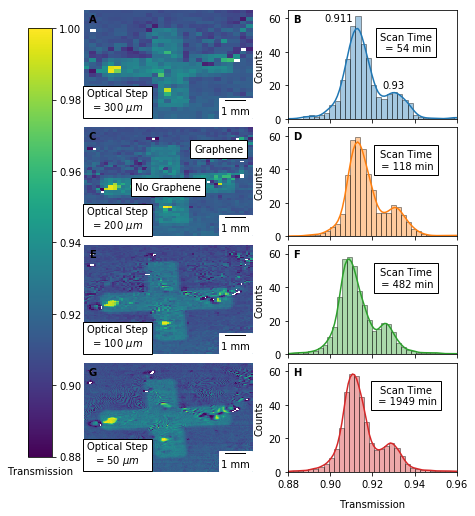

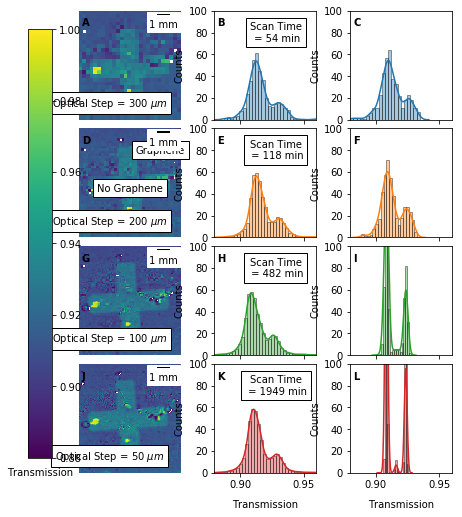

In [57]:
# This code shows the heatmap data and PDFs for experimentally measured cross samples with different optical step 
# lengths

%matplotlib inline

import numpy as np; import matplotlib.pyplot as plt; import seaborn as sb; import string;
import matplotlib as mpl; plt.rcParams.update({'font.size': 10}); import matplotlib.transforms as transforms;
from matplotlib_scalebar.scalebar import ScaleBar;

path='/Users/ajcjake/Desktop/Technique Paper/Laser Scan Data/Cross Experimental Data/'; # beam radius = 7.7 um
time=[];
step300=np.genfromtxt(path+'Gr_PVB_cross_300um_cleanedDataArray.csv',delimiter=',')[4:,:-6]; r,c=step300.shape;
time.append(str(round(r*c*4.1/60)));
step200=np.genfromtxt(path+'Gr_PVB_cross_200um_cleanedDataArray.csv',delimiter=',')[6:,:-9]; r,c=step200.shape;
time.append(str(round(r*c*4.1/60)));
step100=np.genfromtxt(path+'Gr_PVB_cross_100um_cleanedDataArray.csv',delimiter=',')[12:,:-18]; r,c=step100.shape;
time.append(str(round(r*c*4.1/60)));
step50=np.genfromtxt(path+'Gr_PVB_cross_50um_cleanedDataArray.csv',delimiter=',')[24:,:-36]; r,c=step50.shape;
time.append(str(round(r*c*4.1/60)));
params=np.genfromtxt(path+'Gr_PVB_cross_300um_fitParams.csv',delimiter=',');

steps=[r'300 $\mu m$',r'200 $\mu m$',r'100 $\mu m$',r'50 $\mu m$'];

path='/Users/ajcjake/Desktop/Technique Paper/Laser Scan Data/Cross Simulated Data/';
step300S=np.genfromtxt(path+'LaserOutput_radius_8_step_300.csv',delimiter=',');
step200S=np.genfromtxt(path+'LaserOutput_radius_8_step_200.csv',delimiter=',');
step100S=np.genfromtxt(path+'LaserOutput_radius_8_step_100.csv',delimiter=',');
step50S=np.genfromtxt(path+'LaserOutput_radius_8_step_50.csv',delimiter=',');

# Figure without simulation PDFs
fig,((ax1,ax2),
     (ax3,ax4),
     (ax5,ax6),
     (ax7,ax8))=plt.subplots(4,2,figsize=(6.69,8.5));

plt.subplots_adjust(hspace=0.08,wspace=0.21);

cmap='viridis';
heatmapDict={'xticklabels':False, 
             'yticklabels':False, 
             'vmin':0.88, 'vmax':1.00,
             'cbar':False,
             'cmap':cmap};
distDict={'kde':True,
          'hist':True,
          'rug':False,
          'norm_hist':True}
histDict={'edgecolor':'black'};

sb.heatmap(step300,**heatmapDict,ax=ax1); ax1.add_artist(ScaleBar(300,units='um',location='lower right'));
sb.heatmap(step200,**heatmapDict,ax=ax3); ax3.add_artist(ScaleBar(200,units='um',location='lower right'));
sb.heatmap(step100,**heatmapDict,ax=ax5); ax5.add_artist(ScaleBar(100,units='um',location='lower right'));
sb.heatmap(step50,**heatmapDict,ax=ax7); ax7.add_artist(ScaleBar(50,units='um',location='lower right'));

norm=mpl.colors.Normalize(vmin=0.88,vmax=1.00);
axCbar=fig.add_axes([0.01, 0.15, 0.05, 0.7]);
cb1=mpl.colorbar.ColorbarBase(axCbar,cmap=cmap,norm=norm);
axCbar.set_xlabel('Transmission',labelpad=10);

# step 300: blue, step 200: orange, step 100: green, step 50: red
# radius 10
sb.distplot(step300,**distDict,hist_kws=histDict,color='C0',ax=ax2);
sb.distplot(step200,**distDict,hist_kws=histDict,color='C1',ax=ax4);
sb.distplot(step100,**distDict,hist_kws=histDict,color='C2',ax=ax6);
sb.distplot(step50,**distDict,hist_kws=histDict,color='C3',ax=ax8);

strDict={'horizontalalignment':'center',
         'verticalalignment':'center'};

ax2.text(params[1],60,str(round(params[1],3)),strDict,horizontalalignment='right');
ax2.text(params[4],20,str(round(params[4],3)),strDict);

ax3.text(0.80,0.80,'Graphene',strDict,bbox=dict(facecolor='white'),transform=ax3.transAxes);
ax3.text(0.50,0.45,'No Graphene',strDict,bbox=dict(facecolor='white'),transform=ax3.transAxes);

axs=[ax1,ax3,ax5,ax7];
for n,ax in enumerate(axs):
    s1='Optical Step\n= '+steps[n];
    ax.text(0.20,0.15,s1,strDict,bbox=dict(facecolor='white'),transform=ax.transAxes);

axs=[ax2,ax4,ax6]; [ax.set_xticklabels([]) for ax in axs];

axs=[ax2,ax4,ax6,ax8];
for n,ax in enumerate(axs):
    ax.set_ylabel('Counts'); 
    ax.set_xlim(0.88,0.96); 
    ax.set_ylim(0,65);
    s2='Scan Time\n = '+time[n]+' min';
    ax.text(0.7,0.7,s2,strDict,bbox=dict(facecolor='white'),transform=ax.transAxes);

ax8.set_xlabel('Transmission',labelpad=10);

axs=[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8];
[ax.text(0.03,0.89,string.ascii_uppercase[n],transform=ax.transAxes,weight='bold',color='black') for n,ax in
 enumerate(axs)];

plt.savefig('/Users/ajcjake/Desktop/Technique Paper/Figures/fig_cross.svg',dpi=300,format='svg');
plt.show()

# Figure including simulation PDFs
fig,((ax1,ax2,ax3),
     (ax4,ax5,ax6),
     (ax7,ax8,ax9),
     (ax10,ax11,ax12))=plt.subplots(4,3,figsize=(6.69,8.5));
plt.subplots_adjust(hspace=0.08,wspace=0.33);

sb.heatmap(step300,**heatmapDict,ax=ax1); ax1.add_artist(ScaleBar(300,units='um',location='upper right'));
sb.heatmap(step200,**heatmapDict,ax=ax4); ax4.add_artist(ScaleBar(200,units='um',location='upper right'));
sb.heatmap(step100,**heatmapDict,ax=ax7); ax7.add_artist(ScaleBar(100,units='um',location='upper right'));
sb.heatmap(step50,**heatmapDict,ax=ax10); ax10.add_artist(ScaleBar(50,units='um',location='upper right'));

norm=mpl.colors.Normalize(vmin=0.88,vmax=1.00);
axCbar=fig.add_axes([0.02, 0.15, 0.05, 0.7]);
cb1=mpl.colorbar.ColorbarBase(axCbar,cmap=cmap,norm=norm);
axCbar.set_xlabel('Transmission',labelpad=10);

# Experimental data. step 300: blue, step 200: orange, step 100: green, step 50: red
# radius 10
sb.distplot(step300,**distDict,hist_kws=histDict,color='C0',ax=ax2);
sb.distplot(step200,**distDict,hist_kws=histDict,color='C1',ax=ax5);
sb.distplot(step100,**distDict,hist_kws=histDict,color='C2',ax=ax8);
sb.distplot(step50,**distDict,hist_kws=histDict,color='C3',ax=ax11);

# Simulation data. step 300: blue, step 200: orange, step 100: green, step 50: red
# radius 10
sb.distplot(step300S,**distDict,hist_kws=histDict,color='C0',ax=ax3);
sb.distplot(step200S,**distDict,hist_kws=histDict,color='C1',ax=ax6);
sb.distplot(step100S,**distDict,hist_kws=histDict,color='C2',ax=ax9);
sb.distplot(step50S,**distDict,hist_kws=histDict,color='C3',ax=ax12);

axs=[ax2,ax3,ax5,ax6,ax8,ax9];
[ax.set_xticklabels([]) for ax in axs];

axs=[ax2,ax3,ax5,ax6,ax8,ax9,ax11,ax12];
for ax in axs:
    ax.set_ylabel('Counts'); 
    ax.set_xlim(0.88,0.96);
    ax.set_ylim(0,100);

ax4.text(0.80,0.80,'Graphene',strDict,bbox=dict(facecolor='white'),transform=ax4.transAxes);
ax4.text(0.50,0.45,'No Graphene',strDict,bbox=dict(facecolor='white'),transform=ax4.transAxes);   

axs=[ax1,ax4,ax7,ax10];
for n,ax in enumerate(axs):
    s1='Optical Step = '+steps[n];
    ax.text(0.30,0.15,s1,strDict,bbox=dict(facecolor='white'),transform=ax.transAxes);
axs=[ax2,ax5,ax8,ax11];
for n,ax in enumerate(axs):
    s2='Scan Time\n = '+time[n]+' min';
    ax.text(0.6,0.8,s2,strDict,bbox=dict(facecolor='white'),transform=ax.transAxes);

ax11.set_xlabel('Transmission',labelpad=10); ax12.set_xlabel('Transmission',labelpad=10); 

axs=[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12];
[ax.text(0.03,0.86,string.ascii_uppercase[n],transform=ax.transAxes,weight='bold',color='black') for n,ax in
 enumerate(axs)];

#plt.savefig('/Users/ajcjake/Desktop/Technique Paper/Figures/fig_cross.svg',dpi=300,format='svg');
plt.show()

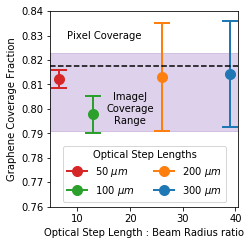

Coverage Fractions
Step 300 = 0.8143037369120167 +/- 0.021574462892495094
Step 200 = 0.8130775042637481 +/- 0.02189942732109884
Step 100 = 0.7978616093899775 +/- 0.007511256532988342
Step 50 = 0.8122372397734178 +/- 0.0036631164838537567


In [19]:
# This code plots the calculated coverage fractions with their error bars for the experimentally measured
# cross data

%matplotlib inline

import numpy as np; import matplotlib.pyplot as plt; plt.rcParams.update({'font.size': 10}); 
import matplotlib.transforms as transforms; import matplotlib.lines as mlines;

path='/Users/ajcjake/Desktop/Technique Paper/Laser Scan Data/Cross Experimental Data/'; # beam radius = 7.7 um
cov=[]; # Array for calculated coverage info. 
intL=[]; intU=[]; # Arrays for bootstrap uncertainty values
stepL=np.asarray([300E-6,200E-6,100E-6,50E-6])/7.7E-6;
# Coverage via ImageJ using max = 110, min = 0, thrs = 97, and 98 for lower and higher coverage,
# respectively, using 50 um step image
imgCovL=0.7909824694808665; imgCovH=0.8229188074588626
# Coverage by counting pixels above threshold where graphene/polymer and polymer peak intersect in PDF for 50 um 
# step image
pixCov=0.8175940284385103;

cov.append(np.genfromtxt(path+'Gr_PVB_cross_300um_pgrCov.csv',delimiter=',')[0]);
intL.append(np.genfromtxt(path+'Gr_PVB_cross_300um_pgrCov.csv',delimiter=',')[1]);
intU.append(np.genfromtxt(path+'Gr_PVB_cross_300um_pgrCov.csv',delimiter=',')[2]);

cov.append(np.genfromtxt(path+'Gr_PVB_cross_200um_pgrCov.csv',delimiter=',')[0]);
intL.append(np.genfromtxt(path+'Gr_PVB_cross_200um_pgrCov.csv',delimiter=',')[1]);
intU.append(np.genfromtxt(path+'Gr_PVB_cross_200um_pgrCov.csv',delimiter=',')[2]);

cov.append(np.genfromtxt(path+'Gr_PVB_cross_100um_pgrCov.csv',delimiter=',')[0]);
intL.append(np.genfromtxt(path+'Gr_PVB_cross_100um_pgrCov.csv',delimiter=',')[1]);
intU.append(np.genfromtxt(path+'Gr_PVB_cross_100um_pgrCov.csv',delimiter=',')[2]);

cov.append(np.genfromtxt(path+'Gr_PVB_cross_50um_pgrCov.csv',delimiter=',')[0]);
intL.append(np.genfromtxt(path+'Gr_PVB_cross_50um_pgrCov.csv',delimiter=',')[1]);
intU.append(np.genfromtxt(path+'Gr_PVB_cross_50um_pgrCov.csv',delimiter=',')[2]);

cov=np.asarray(cov); intL=np.asarray(intL); intU=np.asarray(intU); err=cov-intL;

fig,ax1=plt.subplots(1,1,figsize=(3.37,3.6));

# step 300: blue, step 200: orange, step 100: green, step 50: red 
col=['C0','C1','C2','C3']; lw=2; sz=10;
[ax1.errorbar(step,cov[n],yerr=err[n],
              capsize=8,capthick=lw,
              color=col[n],fmt='o',ms=sz,linewidth=lw) for n,step in enumerate(stepL)]
ax1.set_xlabel('Optical Step Length : Beam Radius ratio'); 
ax1.set_ylabel('Graphene Coverage Fraction'); ax1.set_ylim(0.76,0.84);
ax1.axhspan(imgCovL,imgCovH,color='C4',alpha=0.3);
ax1.axhline(pixCov,color='black',linestyle='--');

strDict={'horizontalalignment':'center',
         'verticalalignment':'center'};
ax1.text(20,0.80,'ImageJ\nCoverage\nRange',strDict);
ax1.text(15,0.83,'Pixel Coverage',strDict)

b=mlines.Line2D([],[],color='C0',marker='o',linewidth=lw,ms=sz,label=r'300 $\mu m$');
o=mlines.Line2D([],[],color='C1',marker='o',linewidth=lw,ms=sz,label=r'200 $\mu m$');
g=mlines.Line2D([],[],color='C2',marker='o',linewidth=lw,ms=sz,label=r'100 $\mu m$');
r=mlines.Line2D([],[],color='C3',marker='o',linewidth=lw,ms=sz,label=r'50 $\mu m$');

ax1.legend(handles=[r,g,o,b],title='Optical Step Lengths',ncol=2,loc='lower center') #,bbox_to_anchor=(1,1));

plt.savefig('/Users/ajcjake/Desktop/Technique Paper/Figures/fig_CovCross.svg',dpi=300,format='svg');
plt.show()

print('Coverage Fractions');
print('Step 300 = '+str(cov[0])+' +/- '+str(abs(cov[0]-intL[0])));
print('Step 200 = '+str(cov[1])+' +/- '+str(abs(cov[1]-intL[1])));
print('Step 100 = '+str(cov[2])+' +/- '+str(abs(cov[2]-intL[2])));
print('Step 50 = '+str(cov[3])+' +/- '+str(abs(cov[3]-intL[3])));

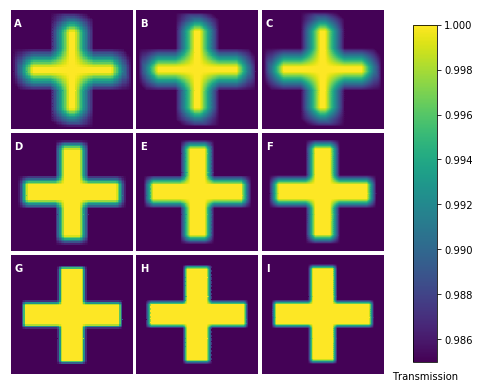

In [31]:
# This code plots the heatmaps of simulated transmission values as a function of optical step length and beam 
# radius

%matplotlib inline

import numpy as np; import matplotlib.pyplot as plt; import seaborn as sb; import matplotlib as mpl;
plt.rcParams.update({'font.size': 10}); import string;

path='/Users/ajcjake/Desktop/Technique Paper/Laser Scan Data/Simulated Data/';
radius25Step25=np.genfromtxt(path+'LaserOutput_radius_25_step_25.csv',delimiter=',');
radius25Step50=np.genfromtxt(path+'LaserOutput_radius_25_step_50.csv',delimiter=',');
radius25Step100=np.genfromtxt(path+'LaserOutput_radius_25_step_100.csv',delimiter=',');

radius50Step25=np.genfromtxt(path+'LaserOutput_radius_50_step_25.csv',delimiter=',');
radius50Step50=np.genfromtxt(path+'LaserOutput_radius_50_step_50.csv',delimiter=',');
radius50Step100=np.genfromtxt(path+'LaserOutput_radius_50_step_100.csv',delimiter=',');

radius100Step25=np.genfromtxt(path+'LaserOutput_radius_100_step_25.csv',delimiter=',');
radius100Step50=np.genfromtxt(path+'LaserOutput_radius_100_step_50.csv',delimiter=',');
radius100Step100=np.genfromtxt(path+'LaserOutput_radius_100_step_100.csv',delimiter=',');

fig=plt.figure(figsize=(6.69,6.69)); rc=(3,3);
ax1=plt.subplot2grid(rc,(0,0)); ax2=plt.subplot2grid(rc,(0,1)); ax3=plt.subplot2grid(rc,(0,2)); 
ax4=plt.subplot2grid(rc,(1,0)); ax5=plt.subplot2grid(rc,(1,1)); ax6=plt.subplot2grid(rc,(1,2)); 
ax7=plt.subplot2grid(rc,(2,0)); ax8=plt.subplot2grid(rc,(2,1)); ax9=plt.subplot2grid(rc,(2,2)); 

plt.subplots_adjust(hspace=0.03,wspace=0.03)

tMin=0.985; tMax=1;
cmap='viridis';
heatmapDict={'xticklabels':False, 
             'yticklabels':False, 
             'vmin':tMin, 'vmax':tMax,
             'cbar':False,
             'cmap':cmap};

sb.heatmap(radius100Step100,**heatmapDict,ax=ax1);
sb.heatmap(radius100Step50,**heatmapDict,ax=ax2);
sb.heatmap(radius100Step25,**heatmapDict,ax=ax3);

sb.heatmap(radius50Step100,**heatmapDict,ax=ax4);
sb.heatmap(radius50Step50,**heatmapDict,ax=ax5);
sb.heatmap(radius50Step25,**heatmapDict,ax=ax6);

sb.heatmap(radius25Step100,**heatmapDict,ax=ax7);
sb.heatmap(radius25Step50,**heatmapDict,ax=ax8);
sb.heatmap(radius25Step25,**heatmapDict,ax=ax9);

norm=mpl.colors.Normalize(vmin=tMin,vmax=tMax);
axCbar=fig.add_axes([0.96, 0.15, 0.05, 0.7]);
cb1=mpl.colorbar.ColorbarBase(axCbar,cmap=cmap,norm=norm);
axCbar.set_xlabel('Transmission',labelpad=10)

axs=[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9];
[ax.text(0.03,0.86,string.ascii_uppercase[n],transform=ax.transAxes,weight='bold',color='white') 
 for n,ax in enumerate(axs)];

#plt.savefig('/Users/ajcjake/Desktop/Technique Paper/Figures/fig_simHeatmaps.svg',dpi=300,format='svg');
plt.show()

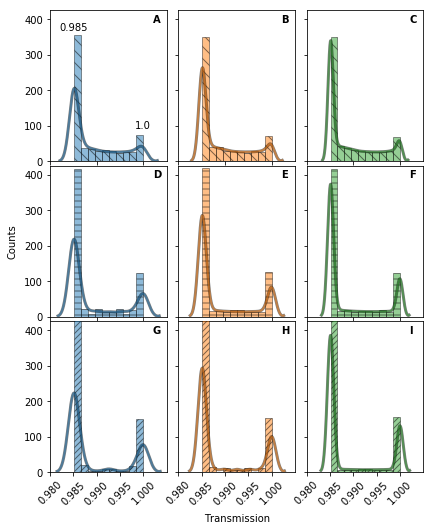

In [32]:
# This code plots the histograms/PDFs of simulated transmission values as a function of optical step length and 
# beam radius

%matplotlib inline

import numpy as np; import matplotlib.pyplot as plt; import seaborn as sb; import matplotlib as mpl;
plt.rcParams.update({'font.size': 10}); import matplotlib.patheffects as pe;
import string; import matplotlib.ticker as tick; import statsmodels.api as sm;

path='/Users/ajcjake/Desktop/Technique Paper/Laser Scan Data/Simulated Data/';

radius25Step25=np.genfromtxt(path+'LaserOutput_radius_25_step_25.csv',delimiter=',').flatten();
params=np.genfromtxt(path+'LaserOutput_radius_25_step_25_fitParams.csv',delimiter=',')
radius25Step50=np.genfromtxt(path+'LaserOutput_radius_25_step_50.csv',delimiter=',').flatten();
radius25Step100=np.genfromtxt(path+'LaserOutput_radius_25_step_100.csv',delimiter=',').flatten();

radius50Step25=np.genfromtxt(path+'LaserOutput_radius_50_step_25.csv',delimiter=',').flatten();
radius50Step50=np.genfromtxt(path+'LaserOutput_radius_50_step_50.csv',delimiter=',').flatten();
radius50Step100=np.genfromtxt(path+'LaserOutput_radius_50_step_100.csv',delimiter=',').flatten();

radius100Step25=np.genfromtxt(path+'LaserOutput_radius_100_step_25.csv',delimiter=',').flatten();
radius100Step50=np.genfromtxt(path+'LaserOutput_radius_100_step_50.csv',delimiter=',').flatten();
radius100Step100=np.genfromtxt(path+'LaserOutput_radius_100_step_100.csv',delimiter=',').flatten();

fig=plt.figure(figsize=(6.69,8.5)); rc=(3,3);
ax1=plt.subplot2grid(rc,(0,0)); ax2=plt.subplot2grid(rc,(0,1)); ax3=plt.subplot2grid(rc,(0,2)); 
ax4=plt.subplot2grid(rc,(1,0)); ax5=plt.subplot2grid(rc,(1,1)); ax6=plt.subplot2grid(rc,(1,2)); 
ax7=plt.subplot2grid(rc,(2,0)); ax8=plt.subplot2grid(rc,(2,1)); ax9=plt.subplot2grid(rc,(2,2)); 

plt.subplots_adjust(hspace=0.03,wspace=0.1);

nHatch=2; lwd=2;  mpl.rcParams['hatch.linewidth']=0.5*lwd;
plotDict={'linewidth':lwd,
          'alpha':0.5,
          'zorder':15,
          'path_effects':[pe.Stroke(linewidth=3,foreground='black',alpha=0.5), pe.Normal()]};
histDict={'linewidth':lwd*0.4,
          'density':True,
          'edgecolor':'black',
          'zorder':10,
          'alpha':0.5};

# step 100: C0, step 50: C1, step 25: C2
# radius 100: \\, radius 50: //, radius 25: -

samp=radius100Step100;kde=sm.nonparametric.KDEUnivariate(samp); kde.fit(); 
xGauss=kde.support; yGauss=kde.density; sortIdx=np.argsort(xGauss);xGauss=xGauss[sortIdx];yGauss=yGauss[sortIdx];
ax1.plot(xGauss,yGauss,color='C0',**plotDict);
ax1.hist(samp,color='C0',hatch='\\'*nHatch,**histDict);

samp=radius100Step50;kde=sm.nonparametric.KDEUnivariate(samp); kde.fit(); 
xGauss=kde.support; yGauss=kde.density; sortIdx=np.argsort(xGauss);xGauss=xGauss[sortIdx];yGauss=yGauss[sortIdx];
ax2.plot(xGauss,yGauss,color='C1',**plotDict);
ax2.hist(samp,color='C1',hatch='\\'*nHatch,**histDict);

samp=radius100Step25; kde=sm.nonparametric.KDEUnivariate(samp); kde.fit(); 
xGauss=kde.support; yGauss=kde.density; sortIdx=np.argsort(xGauss);xGauss=xGauss[sortIdx];yGauss=yGauss[sortIdx];
ax3.plot(xGauss,yGauss,color='C2',**plotDict);
ax3.hist(samp,color='C2',hatch='\\'*nHatch,**histDict);

samp=radius50Step100; kde=sm.nonparametric.KDEUnivariate(samp); kde.fit(); 
xGauss=kde.support; yGauss=kde.density; sortIdx=np.argsort(xGauss);xGauss=xGauss[sortIdx];yGauss=yGauss[sortIdx];
ax4.plot(xGauss,yGauss,color='C0',**plotDict);
ax4.hist(samp,color='C0',hatch='-'*nHatch,**histDict);

samp=radius50Step50; kde=sm.nonparametric.KDEUnivariate(samp); kde.fit(); 
xGauss=kde.support; yGauss=kde.density; sortIdx=np.argsort(xGauss);xGauss=xGauss[sortIdx];yGauss=yGauss[sortIdx];
ax5.plot(xGauss,yGauss,color='C1',**plotDict);
ax5.hist(samp,color='C1',hatch='-'*nHatch,**histDict);

samp=radius50Step25; kde=sm.nonparametric.KDEUnivariate(samp); kde.fit(); 
xGauss=kde.support; yGauss=kde.density; sortIdx=np.argsort(xGauss);xGauss=xGauss[sortIdx];yGauss=yGauss[sortIdx];
ax6.plot(xGauss,yGauss,color='C2',**plotDict);
ax6.hist(samp,color='C2',hatch='-'*nHatch,**histDict);

samp=radius25Step100; kde=sm.nonparametric.KDEUnivariate(samp); kde.fit(); 
xGauss=kde.support; yGauss=kde.density; sortIdx=np.argsort(xGauss);xGauss=xGauss[sortIdx];yGauss=yGauss[sortIdx];
ax7.plot(xGauss,yGauss,color='C0',**plotDict);
ax7.hist(samp,color='C0',hatch='//'*nHatch,**histDict);

samp=radius25Step50; kde=sm.nonparametric.KDEUnivariate(samp); kde.fit(); 
xGauss=kde.support; yGauss=kde.density; sortIdx=np.argsort(xGauss);xGauss=xGauss[sortIdx];yGauss=yGauss[sortIdx];
ax8.plot(xGauss,yGauss,color='C1',**plotDict);
ax8.hist(samp,color='C1',hatch='//'*nHatch,**histDict);

samp=radius25Step25; kde=sm.nonparametric.KDEUnivariate(samp); kde.fit(); 
xGauss=kde.support; yGauss=kde.density; sortIdx=np.argsort(xGauss);xGauss=xGauss[sortIdx];yGauss=yGauss[sortIdx];
ax9.plot(xGauss,yGauss,color='C2',**plotDict);
ax9.hist(samp,color='C2',hatch='//'*nHatch,**histDict);

axY=[ax2,ax3,ax5,ax6,ax8,ax9]; axX=[ax1,ax2,ax3,ax4,ax5,ax6];
[ax.set_yticklabels([]) for ax in axY]; [ax.set_xticklabels([]) for ax in axX];

xMin=0.98; xMax=1.005;
axs=[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9];
for n,ax in enumerate(axs):
    ax.set_xlim(xMin,xMax);
    ax.set_ylim(0,425);
    ax.text(0.88,0.92,string.ascii_uppercase[n],transform=ax.transAxes,weight='bold');

strDict={'horizontalalignment':'center',
         'verticalalignment':'center'};

ax1.text(params[1],375,str(round(params[1],3)),strDict);
ax1.text(params[4],100,str(round(params[4],3)),strDict);

lp=7;
ax4.set_ylabel('Counts',labelpad=lp); ax8.set_xlabel('Transmission',labelpad=lp)
axs=[ax7,ax8,ax9];
xLabels=np.arange(xMin,xMax,0.005); xFmt = tick.FormatStrFormatter('%1.3f'); 
for ax in axs:
    ax.set_xticks(xLabels); ax.set_xticklabels(xLabels,rotation=45); ax.xaxis.set_major_formatter(xFmt);

#plt.savefig('/Users/ajcjake/Desktop/Technique Paper/Figures/fig_simPDFs.pdf',dpi=300,format='pdf');
plt.show()

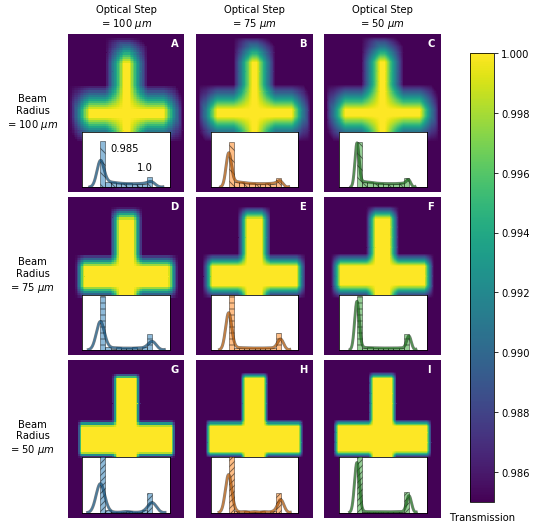

In [2]:
# This code plots the simulated transmission data as a function of optical step length and beam radius and
# includes the histograms/PDFs as insets

%matplotlib inline

import numpy as np; import matplotlib.pyplot as plt; import seaborn as sb; import matplotlib as mpl;
plt.rcParams.update({'font.size': 10}); import matplotlib.patheffects as pe;
import string; import matplotlib.ticker as tick; import statsmodels.api as sm;
from mpl_toolkits.axes_grid.inset_locator import inset_axes; 

path='/Users/ajcjake/Desktop/Technique Paper/Laser Scan Data/Simulated Data/';

radius25Step25=np.genfromtxt(path+'LaserOutput_radius_25_step_25.csv',delimiter=',');
params=np.genfromtxt(path+'LaserOutput_radius_25_step_25_fitParams.csv',delimiter=',');
radius25Step50=np.genfromtxt(path+'LaserOutput_radius_25_step_50.csv',delimiter=',');
radius25Step100=np.genfromtxt(path+'LaserOutput_radius_25_step_100.csv',delimiter=',');

radius50Step25=np.genfromtxt(path+'LaserOutput_radius_50_step_25.csv',delimiter=',');
radius50Step50=np.genfromtxt(path+'LaserOutput_radius_50_step_50.csv',delimiter=',');
radius50Step100=np.genfromtxt(path+'LaserOutput_radius_50_step_100.csv',delimiter=',');

radius100Step25=np.genfromtxt(path+'LaserOutput_radius_100_step_25.csv',delimiter=',');
radius100Step50=np.genfromtxt(path+'LaserOutput_radius_100_step_50.csv',delimiter=',');
radius100Step100=np.genfromtxt(path+'LaserOutput_radius_100_step_100.csv',delimiter=',');

fig=plt.figure(figsize=(6.69,8.90)); rc=(3,3); 
axesDict={'width':'75%',
          'height':'35%',
          'loc':'lower center'};

ax1a=plt.subplot2grid(rc,(0,0)); ax1b=inset_axes(ax1a,**axesDict);
ax2a=plt.subplot2grid(rc,(0,1)); ax2b=inset_axes(ax2a,**axesDict);
ax3a=plt.subplot2grid(rc,(0,2)); ax3b=inset_axes(ax3a,**axesDict);

ax4a=plt.subplot2grid(rc,(1,0)); ax4b=inset_axes(ax4a,**axesDict);
ax5a=plt.subplot2grid(rc,(1,1)); ax5b=inset_axes(ax5a,**axesDict);
ax6a=plt.subplot2grid(rc,(1,2)); ax6b=inset_axes(ax6a,**axesDict);

ax7a=plt.subplot2grid(rc,(2,0)); ax7b=inset_axes(ax7a,**axesDict);
ax8a=plt.subplot2grid(rc,(2,1)); ax8b=inset_axes(ax8a,**axesDict);
ax9a=plt.subplot2grid(rc,(2,2)); ax9b=inset_axes(ax9a,**axesDict);

plt.subplots_adjust(hspace=0.03,wspace=0.1);

tMin=0.985; tMax=1.000;
cmap='viridis';
heatmapDict={'xticklabels':False, 
             'yticklabels':False, 
             'vmin':tMin, 'vmax':tMax,
             'cbar':False,
             'cmap':cmap};

nHatch=2; lwd=2;  mpl.rcParams['hatch.linewidth']=0.5*lwd;
plotDict={'linewidth':lwd,
          'alpha':0.5,
          'zorder':15,
          'path_effects':[pe.Stroke(linewidth=3,foreground='black',alpha=0.5), pe.Normal()]};
histDict={'linewidth':lwd*0.4,
          'density':True,
          'edgecolor':'black',
          'zorder':10,
          'alpha':0.5};
strDict={'horizontalalignment':'center',
         'verticalalignment':'center'};

# step 100: C0, step 50: C1, step 25: C2
# radius 100: \\, radius 50: //, radius 25: -

samp=radius100Step100; kde=sm.nonparametric.KDEUnivariate(samp.flatten()); kde.fit(); 
xGauss=kde.support; yGauss=kde.density; sortIdx=np.argsort(xGauss);xGauss=xGauss[sortIdx];yGauss=yGauss[sortIdx];
sb.heatmap(samp,**heatmapDict,ax=ax1a);
ax1b.plot(xGauss,yGauss,color='C0',**plotDict);
ax1b.hist(samp.flatten(),color='C0',hatch='\\'*nHatch,**histDict);

samp=radius100Step50; kde=sm.nonparametric.KDEUnivariate(samp.flatten()); kde.fit(); 
xGauss=kde.support; yGauss=kde.density; sortIdx=np.argsort(xGauss);xGauss=xGauss[sortIdx];yGauss=yGauss[sortIdx];
sb.heatmap(samp,**heatmapDict,ax=ax2a);
ax2b.plot(xGauss,yGauss,color='C1',**plotDict);
ax2b.hist(samp.flatten(),color='C1',hatch='\\'*nHatch,**histDict);

samp=radius100Step25; kde=sm.nonparametric.KDEUnivariate(samp.flatten()); kde.fit(); 
xGauss=kde.support; yGauss=kde.density; sortIdx=np.argsort(xGauss);xGauss=xGauss[sortIdx];yGauss=yGauss[sortIdx];
sb.heatmap(samp,**heatmapDict,ax=ax3a);
ax3b.plot(xGauss,yGauss,color='C2',**plotDict);
ax3b.hist(samp.flatten(),color='C2',hatch='\\'*nHatch,**histDict);

samp=radius50Step100; kde=sm.nonparametric.KDEUnivariate(samp.flatten()); kde.fit(); 
xGauss=kde.support; yGauss=kde.density; sortIdx=np.argsort(xGauss);xGauss=xGauss[sortIdx];yGauss=yGauss[sortIdx];
sb.heatmap(samp,**heatmapDict,ax=ax4a);
ax4b.plot(xGauss,yGauss,color='C0',**plotDict);
ax4b.hist(samp.flatten(),color='C0',hatch='-'*nHatch,**histDict);

samp=radius50Step50; kde=sm.nonparametric.KDEUnivariate(samp.flatten()); kde.fit(); 
xGauss=kde.support; yGauss=kde.density; sortIdx=np.argsort(xGauss);xGauss=xGauss[sortIdx];yGauss=yGauss[sortIdx];
sb.heatmap(samp,**heatmapDict,ax=ax5a);
ax5b.plot(xGauss,yGauss,color='C1',**plotDict);
ax5b.hist(samp.flatten(),color='C1',hatch='-'*nHatch,**histDict);

samp=radius50Step25; kde=sm.nonparametric.KDEUnivariate(samp.flatten()); kde.fit(); 
xGauss=kde.support; yGauss=kde.density; sortIdx=np.argsort(xGauss);xGauss=xGauss[sortIdx];yGauss=yGauss[sortIdx];
sb.heatmap(samp,**heatmapDict,ax=ax6a);
ax6b.plot(xGauss,yGauss,color='C2',**plotDict);
ax6b.hist(samp.flatten(),color='C2',hatch='-'*nHatch,**histDict);

samp=radius25Step100; kde=sm.nonparametric.KDEUnivariate(samp.flatten()); kde.fit(); 
xGauss=kde.support; yGauss=kde.density; sortIdx=np.argsort(xGauss);xGauss=xGauss[sortIdx];yGauss=yGauss[sortIdx];
sb.heatmap(samp,**heatmapDict,ax=ax7a);
ax7b.plot(xGauss,yGauss,color='C0',**plotDict);
ax7b.hist(samp.flatten(),color='C0',hatch='//'*nHatch,**histDict);

samp=radius25Step50; kde=sm.nonparametric.KDEUnivariate(samp.flatten()); kde.fit(); 
xGauss=kde.support; yGauss=kde.density; sortIdx=np.argsort(xGauss);xGauss=xGauss[sortIdx];yGauss=yGauss[sortIdx];
sb.heatmap(samp,**heatmapDict,ax=ax8a);
ax8b.plot(xGauss,yGauss,color='C1',**plotDict);
ax8b.hist(samp.flatten(),color='C1',hatch='//'*nHatch,**histDict);

samp=radius25Step25; kde=sm.nonparametric.KDEUnivariate(samp.flatten()); kde.fit(); 
xGauss=kde.support; yGauss=kde.density; sortIdx=np.argsort(xGauss);xGauss=xGauss[sortIdx];yGauss=yGauss[sortIdx];
sb.heatmap(samp,**heatmapDict,ax=ax9a);
ax9b.plot(xGauss,yGauss,color='C2',**plotDict);
ax9b.hist(samp.flatten(),color='C2',hatch='//'*nHatch,**histDict);

norm=mpl.colors.Normalize(vmin=tMin,vmax=tMax);
axCbar=fig.add_axes([0.96, 0.15, 0.05, 0.7]);
cb1=mpl.colorbar.ColorbarBase(axCbar,cmap=cmap,norm=norm);
axCbar.set_xlabel('Transmission',labelpad=10)

axs=[ax1b,ax2b,ax3b,ax4b,ax5b,ax6b,ax7b,ax8b,ax9b];
xMin=0.980; xMax=1.005;
for n,ax in enumerate(axs):
    ax.set_xlim(xMin,xMax); ax.set_ylim(0,425);
    ax.set_yticklabels([]); ax.set_xticklabels([]);
    ax.set_xticks([]); ax.set_yticks([]);

axs=[ax1a,ax2a,ax3a,ax4a,ax5a,ax6a,ax7a,ax8a,ax9a];
[ax.text(0.88,0.92,string.ascii_uppercase[n],transform=ax.transAxes,weight='bold',color='white') for n,ax in enumerate(axs)];

strDict={'horizontalalignment':'center',
         'verticalalignment':'center'};

ax1b.text(params[1]+0.007,300,str(round(params[1],3)),strDict);
ax1b.text(params[4],150,str(round(params[4],3)),strDict,horizontalalignment='right');

ft=10;
s='Optical Step\n= '+r'100 $\mu m$'; ax1a.set_title(s,fontsize=ft);
s='Optical Step\n= '+r'75 $\mu m$'; ax2a.set_title(s,fontsize=ft);
s='Optical Step\n= '+r'50 $\mu m$'; ax3a.set_title(s,fontsize=ft);

s='Beam\nRadius\n= '+r'100 $\mu m$'; ax1a.text(-0.30,0.50,s,strDict,transform=ax1a.transAxes,fontsize=ft);
s='Beam\nRadius\n= '+r'75 $\mu m$'; ax4a.text(-0.30,0.50,s,strDict,transform=ax4a.transAxes,fontsize=ft);
s='Beam\nRadius\n= '+r'50 $\mu m$'; ax7a.text(-0.30,0.50,s,strDict,transform=ax7a.transAxes,fontsize=ft);

plt.savefig('/Users/ajcjake/Desktop/Technique Paper/Figures/fig_simPDFs_inset.pdf',dpi=300,format='pdf');

plt.show()

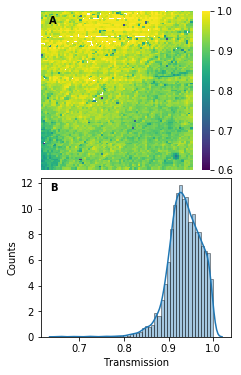

In [43]:
# This code plots the optical transmission data for a plain PMMA substrate

%matplotlib inline
%run get_heatmap.ipynb

#Import necessary packages
import numpy as np; import seaborn as sb; import matplotlib.pyplot as plt; import string;
plt.rcParams.update({'font.size': 10});

def gauss(x,*params):
    y=np.zeros_like(x);
    for i in range(0,len(params),3):
        a=params[i]; x0=params[i+1]; sigma=params[i+2];
        y=y+a*np.exp(-(x-x0)**2/(2*sigma**2));
    return y

# Make figure subplots
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(3.4,6)); plt.subplots_adjust(hspace=0.05);

# Import data. Correct for background. Get heatmap
path='/Users/ajcjake/Desktop/Technique Paper/Laser Scan Data/Popoff Samples/'; samp='PMMA_135_5'
dataArray=np.genfromtxt(path+samp+'_rawDataArray.csv',delimiter=',');

tMin=0.6; tMax=1.0;
cmap='viridis';
heatmapDict={'xticklabels':False, 
             'yticklabels':False, 
             'vmin':tMin, 'vmax':tMax,
             'cbar':True,
             'cmap':cmap};
distDict={'kde':True,
          'hist':True,
          'rug':False,
          'norm_hist':True}
histDict={'edgecolor':'black'};

# Cut non-measured area. Display full image
sb.heatmap(dataArray,**heatmapDict,ax=ax1);

# Show KDE and histogram
sb.distplot(dataArray.flatten(),**distDict,hist_kws=histDict,ax=ax2);
    
# Label subplots
axs=[ax1,ax2];
[ax.text(0.05,0.92,string.ascii_uppercase[n],transform=ax.transAxes,weight='bold') for n,ax in enumerate(axs)];

ax1.set_xlabel(''); ax1.set_ylabel(''); ax1.axis('off');
ax2.set_xlabel('Transmission'); ax2.set_ylabel('Counts'); 

newPath='/Users/ajcjake/Desktop/Technique Paper/Figures/';
plt.savefig(newPath+'fig_popoff.pdf',format='pdf',dpi=300);

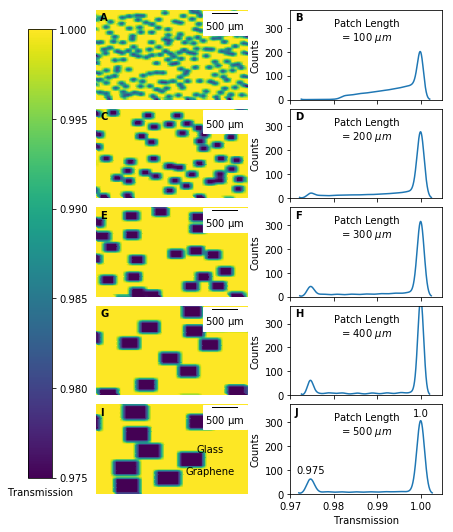

In [2]:
# This code loads and plots random graphene patch analysis

import numpy as np; import matplotlib.pyplot as plt; import seaborn as sb; 
plt.rcParams.update({'font.size': 10}); import matplotlib as mpl;
from matplotlib_scalebar.scalebar import ScaleBar; import statsmodels.api as sm; import string;

path='/Users/ajcjake/Desktop/Technique Paper/Laser Scan Data/MLE Analysis/';

mle100=np.genfromtxt(path+'MLE_square_radius_10_step_15_patch_100.csv',delimiter=',');
mle200=np.genfromtxt(path+'MLE_square_radius_10_step_15_patch_200.csv',delimiter=',');
mle300=np.genfromtxt(path+'MLE_square_radius_10_step_15_patch_300.csv',delimiter=',');
mle400=np.genfromtxt(path+'MLE_square_radius_10_step_15_patch_400.csv',delimiter=',');
mle500=np.genfromtxt(path+'MLE_square_radius_10_step_15_patch_500.csv',delimiter=',');
params=np.genfromtxt(path+'MLE_square_radius_10_step_15_patch_800_fitParams.csv',delimiter=',');

fig,((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10))=plt.subplots(5,2,figsize=(6.69,8.90));
plt.subplots_adjust(left=0.18,wspace=0.28,hspace=0.1);

tMin=0.975; tMax=1.000;
cmap='viridis';
heatmapDict={'xticklabels':False, 
             'yticklabels':False, 
             'vmin':tMin, 'vmax':tMax,
             'cbar':False,
             'cmap':cmap};

strDict={'horizontalalignment':'center',
         'verticalalignment':'center'};

xS,yS=0.50,0.75;

# row 1
samp=mle100; 
kde=sm.nonparametric.KDEUnivariate(samp.flatten()); kde.fit(); xGauss=kde.support; yGauss=kde.density; 
sortIdx=np.argsort(xGauss);xGauss=xGauss[sortIdx];yGauss=yGauss[sortIdx];

sb.heatmap(samp,**heatmapDict,ax=ax1); ax1.add_artist(ScaleBar(15,units='um'));
s='Patch Length\n'+'= 100 '+r'$\mu m$';
ax2.text(xS,yS,s,strDict,transform=ax2.transAxes);
ax2.plot(xGauss,yGauss); 

# row 2
samp=mle200; 
kde=sm.nonparametric.KDEUnivariate(samp.flatten()); kde.fit(); xGauss=kde.support; yGauss=kde.density; 
sortIdx=np.argsort(xGauss);xGauss=xGauss[sortIdx];yGauss=yGauss[sortIdx];

sb.heatmap(samp,**heatmapDict,ax=ax3); ax3.add_artist(ScaleBar(15,units='um'));
s='Patch Length\n'+'= 200 '+r'$\mu m$';
ax4.text(xS,yS,s,strDict,transform=ax4.transAxes);
ax4.plot(xGauss,yGauss); 

# row 3
samp=mle300; 
kde=sm.nonparametric.KDEUnivariate(samp.flatten()); kde.fit(); xGauss=kde.support; yGauss=kde.density; 
sortIdx=np.argsort(xGauss);xGauss=xGauss[sortIdx];yGauss=yGauss[sortIdx];

sb.heatmap(samp,**heatmapDict,ax=ax5); ax5.add_artist(ScaleBar(15,units='um'));
s='Patch Length\n'+'= 300 '+r'$\mu m$';
ax6.text(xS,yS,s,strDict,transform=ax6.transAxes);
ax6.plot(xGauss,yGauss); 

# row 4
samp=mle400; 
kde=sm.nonparametric.KDEUnivariate(samp.flatten()); kde.fit(); xGauss=kde.support; yGauss=kde.density; 
sortIdx=np.argsort(xGauss);xGauss=xGauss[sortIdx];yGauss=yGauss[sortIdx];

sb.heatmap(samp,**heatmapDict,ax=ax7); ax7.add_artist(ScaleBar(15,units='um'));
s='Patch Length\n'+'= 400 '+r'$\mu m$';
ax8.text(xS,yS,s,strDict,transform=ax8.transAxes);
ax8.plot(xGauss,yGauss); 

# row 5
samp=mle500; 
kde=sm.nonparametric.KDEUnivariate(samp.flatten()); kde.fit(); xGauss=kde.support; yGauss=kde.density; 
sortIdx=np.argsort(xGauss);xGauss=xGauss[sortIdx];yGauss=yGauss[sortIdx];

sb.heatmap(samp,**heatmapDict,ax=ax9); ax9.add_artist(ScaleBar(15,units='um'));
s='Patch Length\n'+'= 500 '+r'$\mu m$';
ax10.text(xS,yS,s,strDict,transform=ax10.transAxes);
ax10.plot(xGauss,yGauss); 

norm=mpl.colors.Normalize(vmin=tMin,vmax=tMax);
axCbar=fig.add_axes([0.04, 0.15, 0.05, 0.7]);
cb1=mpl.colorbar.ColorbarBase(axCbar,cmap=cmap,norm=norm);
axCbar.set_xlabel('Transmission',labelpad=10)

# Set limits and labels
axs=[ax2,ax4,ax6,ax8,ax10];
for ax in axs:
    ax.set_ylim(0,375);
    ax.set_ylabel('Counts');
    ax.set_xlim(tMin-0.005,tMax+0.005);
    
axs=[ax2,ax4,ax6,ax8]; [ax.set_xticklabels([]) for ax in axs];
ax10.set_xlabel('Transmission');

# Add graphene and peak labels
ax9.text(0.75,0.50,'Glass',strDict,transform=ax9.transAxes); 
ax9.text(0.75,0.25,'Graphene',strDict,transform=ax9.transAxes);
ax10.text(params[1],100,str(round(params[1],3)),strDict);
ax10.text(params[4],335,str(round(params[4],3)),strDict);

# Label subplots
axs=[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10];
[ax.text(0.03,0.88,string.ascii_uppercase[n],transform=ax.transAxes,weight='bold') for n,ax in enumerate(axs)];

plt.savefig('/Users/ajcjake/Desktop/Technique Paper/Figures/fig_MLE.pdf',dpi=300,format='pdf');

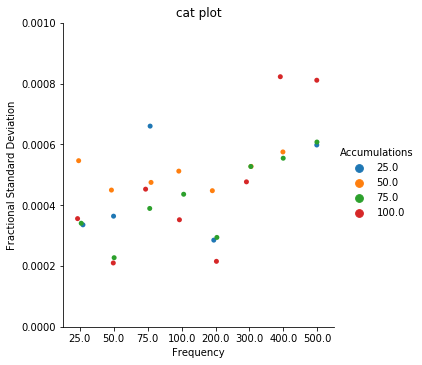

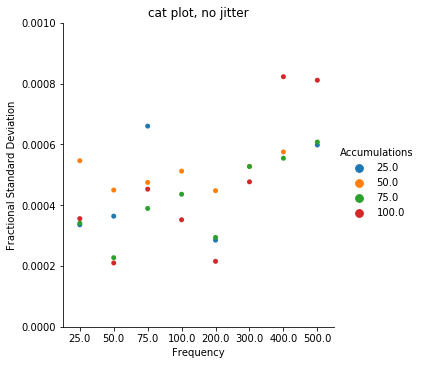

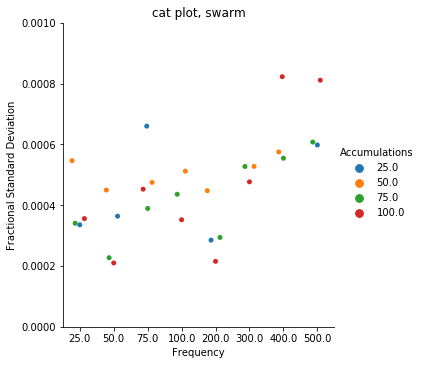

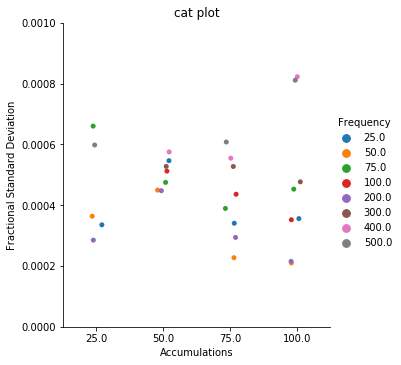

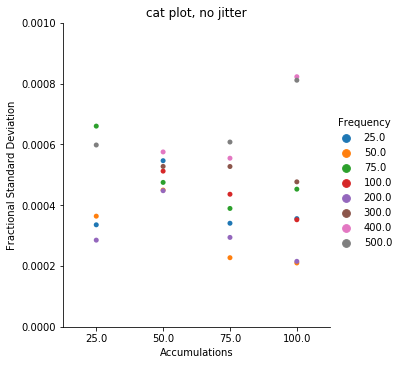

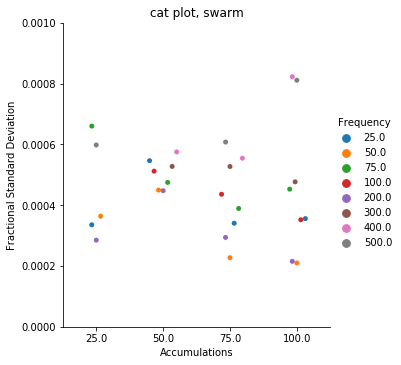

In [23]:
# This code plots the laser beam detected power as a function of collection accumulations
# and frequency data using different test plots

%matplotlib inline

import numpy as np; import matplotlib.pyplot as plt; import seaborn as sb; import matplotlib as mpl;
plt.rcParams.update({'font.size': 10}); import matplotlib.patheffects as pe;
import string; import matplotlib.ticker as tick; import statsmodels.api as sm;

path='/Users/ajcjake/Desktop/Technique Paper/Laser Scan Data/Setup Data/';
fNData=pd.read_csv(path+'masterFreqN.csv');
fracData=pd.read_csv(path+'fracFreqN.csv');

sb.catplot(x='Frequency',y='Fractional Standard Deviation',hue='Accumulations',data=fracData); 
plt.title('cat plot'); plt.ylim(0,0.001); 
plt.show()

sb.catplot(x='Frequency',y='Fractional Standard Deviation',hue='Accumulations',data=fracData,jitter=False); 
plt.title('cat plot, no jitter'); plt.ylim(0,0.001); 
plt.show()

sb.catplot(x='Frequency',y='Fractional Standard Deviation',hue='Accumulations',data=fracData,kind='swarm'); 
plt.title('cat plot, swarm'); plt.ylim(0,0.001); 
plt.show()

sb.catplot(x='Accumulations',y='Fractional Standard Deviation',hue='Frequency',data=fracData); 
plt.title('cat plot'); plt.ylim(0,0.001); 
plt.show()

sb.catplot(x='Accumulations',y='Fractional Standard Deviation',hue='Frequency',data=fracData,jitter=False); 
plt.title('cat plot, no jitter'); plt.ylim(0,0.001); 
plt.show()

sb.catplot(x='Accumulations',y='Fractional Standard Deviation',hue='Frequency',data=fracData,kind='swarm'); 
plt.title('cat plot, swarm'); plt.ylim(0,0.001); 
plt.show()


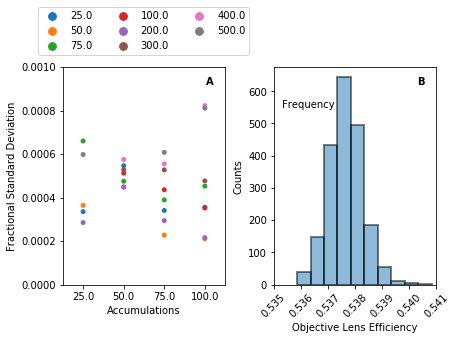

In [1]:
# This code plots the laser beam set up data, including detected power as a function of collection accumulations
# and frequency, and determination of correction factor f

%matplotlib inline

import numpy as np; import matplotlib.pyplot as plt; import seaborn as sb; plt.rcParams.update({'font.size': 10});
import string; import pandas as pd; import matplotlib.ticker as tick;

path='/Users/ajcjake/Desktop/Technique Paper/Laser Scan Data/Setup Data/';
cfData=np.genfromtxt(path+'nonSample.csv',delimiter=',');
fracData=pd.read_csv(path+'fracFreqN.csv');

a=np.genfromtxt(path+'nonSample.csv',skip_header=True,delimiter=',');
cf=a[:,3]/a[:,2]*3/2; 

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(6.69,4)); 
plt.subplots_adjust(hspace=0.01,wspace=0.3);

ax=sb.stripplot(x='Accumulations',y='Fractional Standard Deviation',hue='Frequency',data=fracData,jitter=False,ax=ax1);
# Fix wonky legend from Seaborn
handles,labels=ax.get_legend_handles_labels(); 
ax1.legend(handles[-8:],labels[-8:],bbox_to_anchor=(0.5,1.3),loc='upper center',ncol=3); ax1.set_ylim(0,0.001);

histDict={'linewidth':2,
          'density':True,
          'edgecolor':'black',
          'zorder':10,
          'alpha':0.5};
ax2.text(0.5353,550,'Frequency'); # To be used with plot A legend

ax2.hist(cf,**histDict); ax2.set_ylabel('Counts'); ax2.set_xlabel('Objective Lens Efficiency');
xMin=0.535; xMax=0.541; xLabels=np.arange(xMin,xMax,0.001);
xFmt = tick.FormatStrFormatter('%1.3f'); ax2.set_xlim(xMin,xMax);
ax2.set_xticks(xLabels); ax2.set_xticklabels(xLabels,rotation=45);
ax2.xaxis.set_major_formatter(xFmt);

axs=[ax1,ax2];
[ax.text(0.88,0.92,string.ascii_uppercase[n],transform=ax.transAxes,weight='bold') for n,ax in enumerate(axs)];

plt.savefig('/Users/ajcjake/Desktop/Technique Paper/Figures/fig_laserSetup.pdf',dpi=300,format='pdf');
plt.show()